In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
movies_df = pd.read_csv('movies.csv')
rating_df = pd.read_csv('rating.csv')

print(movies_df.shape)
print(rating_df.shape)

(9742, 3)
(100836, 4)


In [3]:
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
rating_df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [5]:
print("Total Unique Users : ", rating_df['userId'].nunique())
print("Total Unique movies which are rated : ", rating_df['movieId'].nunique())

Total Unique Users :  610
Total Unique movies which are rated :  9724


In [6]:
print("Movies where no ratings were given in dataset :....................")
movies_df[~movies_df['movieId'].isin(rating_df['movieId'])]

Movies where no ratings were given in dataset :....................


,movieId,title,genres
816,1076,"Innocents, The (1961)",Drama|Horror|Thriller
2211,2939,Niagara (1953),Drama|Thriller
2499,3338,For All Mankind (1989),Documentary
2587,3456,"Color of Paradise, The (Rang-e khoda) (1999)",Drama
3118,4194,I Know Where I'm Going! (1945),Drama|Romance|War
4037,5721,"Chosen, The (1981)",Drama
4506,6668,"Road Home, The (Wo de fu qin mu qin) (1999)",Drama|Romance
4598,6849,Scrooge (1970),Drama|Fantasy|Musical
4704,7020,Proof (1991),Comedy|Drama|Romance
5020,7792,"Parallax View, The (1974)",Thriller


In [7]:
combine_df = pd.merge(left=rating_df, right=movies_df,how='left',on='movieId')
combine_df.shape

(100836, 6)

In [8]:
combine_df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


In [9]:
print("Maximum rating given to a movie ",combine_df['rating'].max())
print("Minimum rating given to a movie ",combine_df['rating'].min())

Maximum rating given to a movie  5.0
Minimum rating given to a movie  0.5


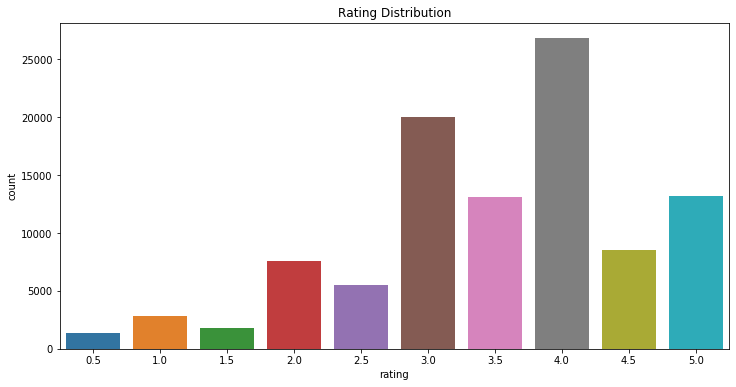

In [10]:
plt.figure(figsize=(12,6))
sns.countplot(x=combine_df['rating'])
plt.title("Rating Distribution")
plt.show()

In [11]:
combine_df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


In [12]:
rating_count = dict(combine_df['movieId'].value_counts())
combine_df['rating_count'] = combine_df['movieId'].map(rating_count)
combine_df.head()

,userId,movieId,rating,timestamp,title,genres,rating_count
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance,52
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller,102
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,203
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,204


In [13]:
combine_df['rating_count'].describe()

count    100836.000000
mean         58.755801
std          61.966670
min           1.000000
25%          13.000000
50%          39.000000
75%          84.000000
max         329.000000
Name: rating_count, dtype: float64

In [14]:
### Considering only those movies where rating count is more than 50
combine_df_1 = combine_df[combine_df['rating_count'] > 50]
print("Total ratings : ",combine_df_1.shape[0])
print("Unique Movies after taking more than 50 rating count : ", combine_df_1['movieId'].nunique())
print("Unique user after taking more than 50 rating count : ", combine_df_1['userId'].nunique())

Total ratings :  40660
Unique Movies after taking more than 50 rating count :  436
Unique user after taking more than 50 rating count :  606


In [15]:
# Create a user rating matrix
movies_matrix = pd.pivot(data=combine_df_1, index='title', columns='userId', values='rating').fillna(0)
movies_matrix.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
title,,,,,,,,,,,,,,,,,,,,,
10 Things I Hate About You (1999),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0
12 Angry Men (1957),0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2001: A Space Odyssey (1968),0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,5.0,0.0,0.0,5.0,0.0,3.0,0.0,4.5
28 Days Later (2002),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.5,0.0,5.0
300 (2007),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,3.0,0.0,0.0,5.0,0.0,4.0


In [126]:
print(combine_df_1.shape)
print(movies_matrix.shape)

(40660, 7)
(436, 606)


In [106]:
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

movies_matrix_df = csr_matrix(movies_matrix.values)
model_knn = NearestNeighbors(n_neighbors=5, metric='cosine', algorithm='brute')
model_knn.fit(movies_matrix_df)

NearestNeighbors(algorithm='brute', metric='cosine')

In [279]:
# Check for randm value
print(combine_df_1.iloc[120][['title','genres']])
index_value = movies_matrix.index.get_loc('Dark Knight, The (2008)')
index_value

title     Dark Knight, The (2008)
genres    Action|Crime|Drama|IMAX
Name: 240, dtype: object


114

In [280]:
dict_1 ={}
distance , indices = model_knn.kneighbors(movies_matrix.iloc[index_value].values.reshape(1,-1),n_neighbors=6)
for i in np.arange(6):
    dict_1[indices[0][i]] = distance[0][i]
dict_1 = {index:value for index,value in sorted(dict_1.items(), key=lambda x : x[1], reverse=False)}

In [281]:
for index, value in dict_1.items():
    print("Movie : {} with distant value: {} with genre : {} ".format(movies_matrix.iloc[index].name,np.round(value,2),combine_df_1[combine_df_1['title'] == movies_matrix.iloc[index].name]['genres'].iloc[0]))

Movie : Dark Knight, The (2008) with distant value: 0.0 with genre : Action|Crime|Drama|IMAX 
Movie : Inception (2010) with distant value: 0.27 with genre : Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX 
Movie : Iron Man (2008) with distant value: 0.33 with genre : Action|Adventure|Sci-Fi 
Movie : Dark Knight Rises, The (2012) with distant value: 0.33 with genre : Action|Adventure|Crime|IMAX 
Movie : Batman Begins (2005) with distant value: 0.35 with genre : Action|Crime|IMAX 
Movie : Lord of the Rings: The Return of the King, The (2003) with distant value: 0.38 with genre : Action|Adventure|Drama|Fantasy 
